In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jiyayadav0505","key":"ae066e8623b5ce309fcba5784e2dc60b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:16<00:00, 230MB/s]
100% 2.29G/2.29G [00:16<00:00, 148MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('chest-xray-pneumonia.zip', 'r') as zip_ref:
    zip_ref.extractall('chest_xray')

In [ ]:
train_folder = 'chest_xray/chest_xray/train'
test_folder = 'chest_xray/chest_xray/test'
val_folder = 'chest_xray/chest_xray/val'


In [ ]:
IMG_SIZE = 256

In [ ]:
def load_data(data_dir, augment=False):
    datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=20 if augment else 0,
        width_shift_range=0.2 if augment else 0,
        height_shift_range=0.2 if augment else 0,
        shear_range=0.2 if augment else 0,
        zoom_range=0.2 if augment else 0,
        horizontal_flip=True if augment else False
    )
    return datagen.flow_from_directory(
        data_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=32,
        class_mode='binary',
        color_mode='grayscale'
    )

train_data = load_data(train_folder, augment=True)
val_data = load_data(val_folder)
test_data = load_data(test_folder)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1), padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')  # Binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 377ms/step - accuracy: 0.7071 - loss: 0.6467 - val_accuracy: 0.5000 - val_loss: 0.6414
Epoch 2/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 59s 362ms/step - accuracy: 0.7747 - loss: 0.4392 - val_accuracy: 0.5625 - val_loss: 1.2061
Epoch 3/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 59s 362ms/step - accuracy: 0.8366 - loss: 0.3406 - val_accuracy: 0.6250 - val_loss: 1.6241
Epoch 4/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 59s 361ms/step - accuracy: 0.8558 - loss: 0.3162 - val_accuracy: 0.6250 - val_loss: 1.8632
Epoch 5/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 59s 359ms/step - accuracy: 0.8658 - loss: 0.2994 - val_accuracy: 0.6250 - val_loss: 1.7333
Epoch 6/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 356ms/step - accuracy: 0.8777 - loss: 0.2822 - val_accuracy: 0.6250 - val_loss: 1.5893
Epoch 7/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 59s 359ms/step - accuracy: 0.8814 - loss: 0.2699 - val_accuracy: 0.5000 - val_loss: 1.8631
Epoch 8/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 59s 360ms/step - accuracy: 0.8978 - loss: 0

In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.7292 - loss: 0.6422
Test Accuracy: 0.73


In [ ]:
model.save("improved_cnn_model.h5")
print("Model saved.")

Model saved.


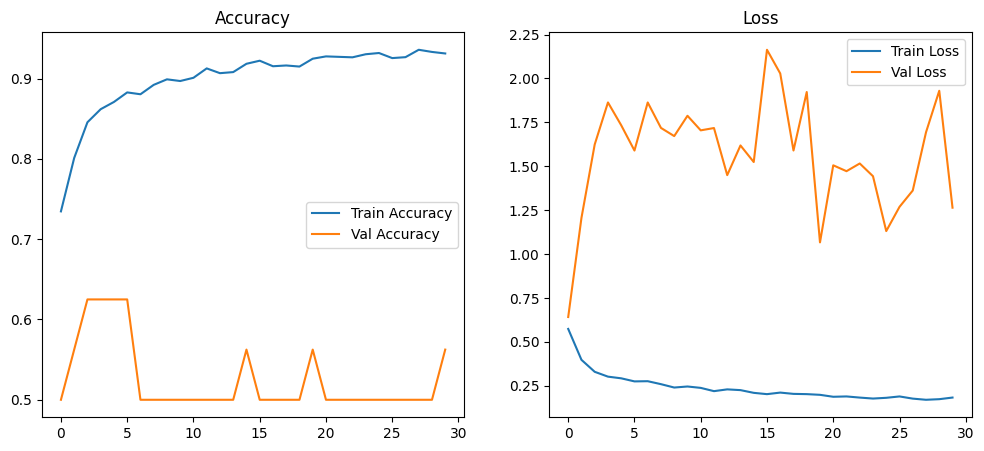

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np


In [ ]:
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

In [ ]:
def predict_image(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    return prediction

In [ ]:
# Random image path from the 'train' folder
train_images = os.listdir('chest_xray/chest_xray/train/NORMAL')  # For Normal class
img_path = os.path.join('chest_xray/chest_xray/train/NORMAL', train_images[11])

print(f"Image Path: {img_path}")

Image Path: chest_xray/chest_xray/train/NORMAL/IM-0433-0001.jpeg


In [ ]:
prediction = predict_image(model, img_path)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step
[[0.11505042]]


Prediction: Normal


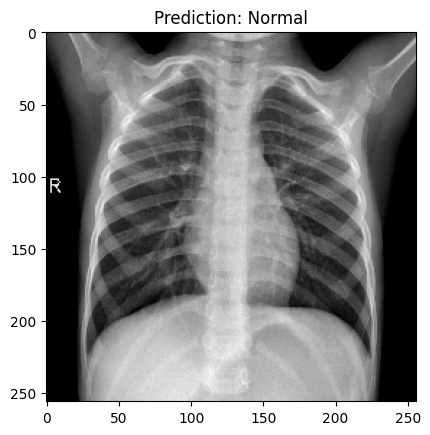

In [ ]:
# Output Prediction
if prediction < 0.5:
    print("Prediction: Normal")
else:
    print("Prediction: Pneumonia")

img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE), color_mode='grayscale')
plt.imshow(img, cmap='gray')
plt.title("Prediction: " + ("Normal" if prediction < 0.5 else "Pneumonia"))
plt.show()